## Action plan

### EDA

1. Missing data/nulls
2. Statistics
3. Numerical
    - Distribution
    - Correlation
4. Categorical
    - Value count
5. Splits

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/customers.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Let us first make sure there are no spelling errors in the data.

In [3]:
col = [col for col in df.columns]

for col in col:
    print(col)
    print(df[col].unique())
    print('-------------------')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
-------------------
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
-------------------
marital
['married' 'single' 'divorced']
-------------------
education
['tertiary' 'secondary' 'unknown' 'primary']
-------------------
default
['no' 'yes']
-------------------
balance
[ 2143    29     2 ...  8205 14204 16353]
-------------------
housing
['yes' 'no']
-------------------
loan
['no' 'yes']
-------------------
contact
['unknown' 'cellular' 'telephone']
-------------------
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
-------------------
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'fe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


We have 7 integer types and 10 objects. All data types are correctly classified.

In [5]:
df_num = df[['age', 'balance', 'duration']]

In [6]:
col_num = [col for col in df_num.columns]

for col in col_num:
    print(col)
    print('Skewness: {:.4f}'.format(df_num[col].skew()))
    print('Kurtosis: {:.4f}'.format(df_num[col].kurt()))
    print('-------------------')
    
print('null values: ', df.isnull().values.any())
df_num.describe().round(2)

age
Skewness: 0.6848
Kurtosis: 0.3196
-------------------
balance
Skewness: 8.3603
Kurtosis: 140.7515
-------------------
duration
Skewness: 3.1443
Kurtosis: 18.1539
-------------------
null values:  False


,age,balance,duration
count,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16
std,10.62,3044.77,257.53
min,18.00,-8019.00,0.00
25%,33.00,72.00,103.00
50%,39.00,448.00,180.00
75%,48.00,1428.00,319.00
max,95.00,102127.00,4918.00


No missing or null values.

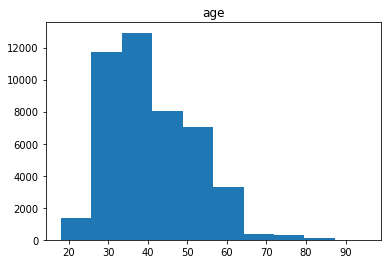

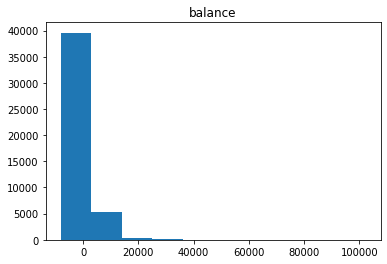

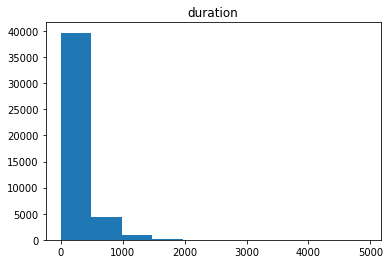

In [7]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

/Users/metinalisho/anaconda3/envs/bank-marketing-classification/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/metinalisho/anaconda3/envs/bank-marketing-classification/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/metinalisho/anaconda3/envs/bank-marketing-classification/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be remove

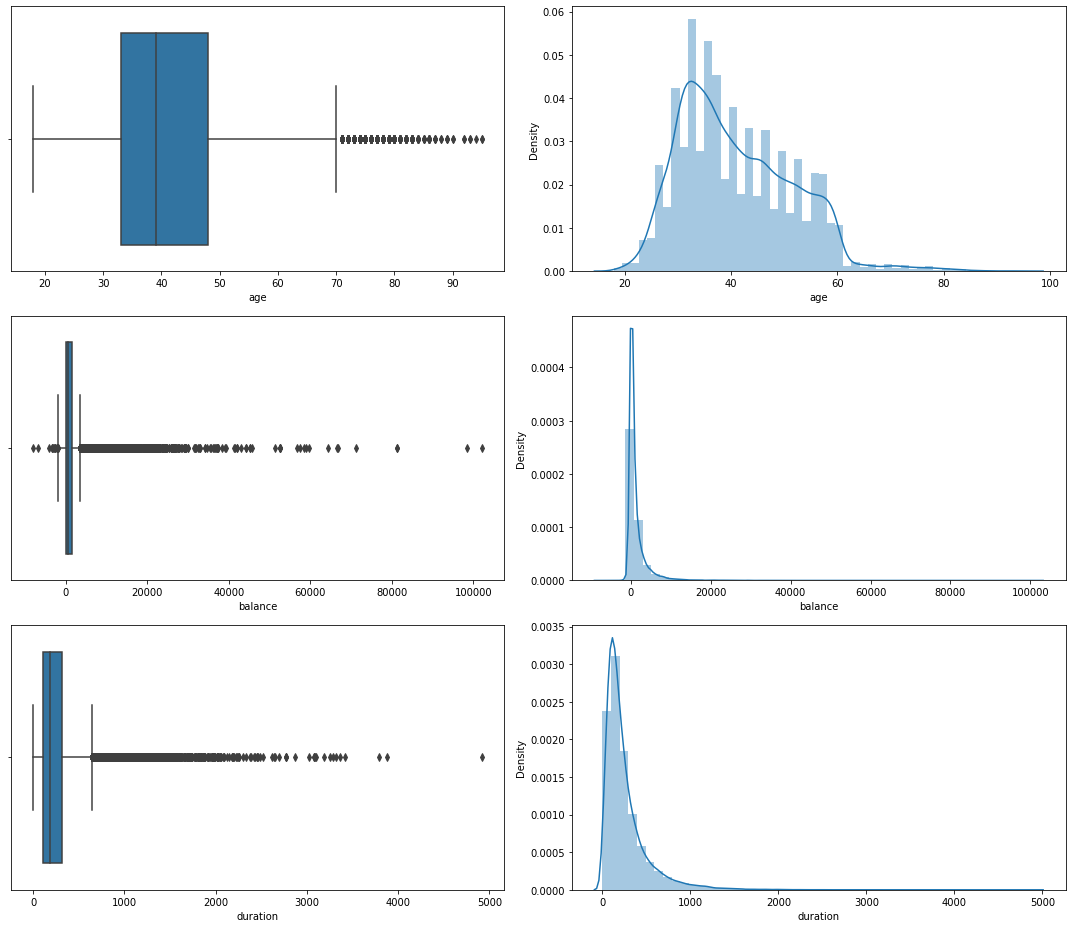

In [8]:
fig, ax = plt.subplots(3, 2, figsize = (15, 13))

sns.boxplot(x=df_num.age, ax=ax[0,0])
sns.distplot(df_num.age, ax=ax[0,1])

sns.boxplot(x=df_num.balance, ax=ax[1,0])
sns.distplot(df_num.balance, ax=ax[1,1])

sns.boxplot(x=df_num.duration, ax=ax[2,0])
sns.distplot(df_num.duration, ax=ax[2,1])

plt.tight_layout()

## Normalise?

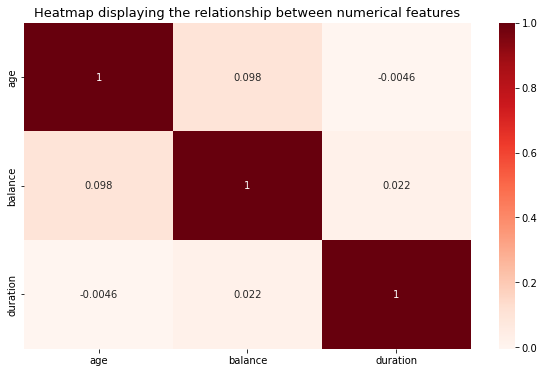

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between numerical features', fontsize=13)
plt.show()

Not much correlation.

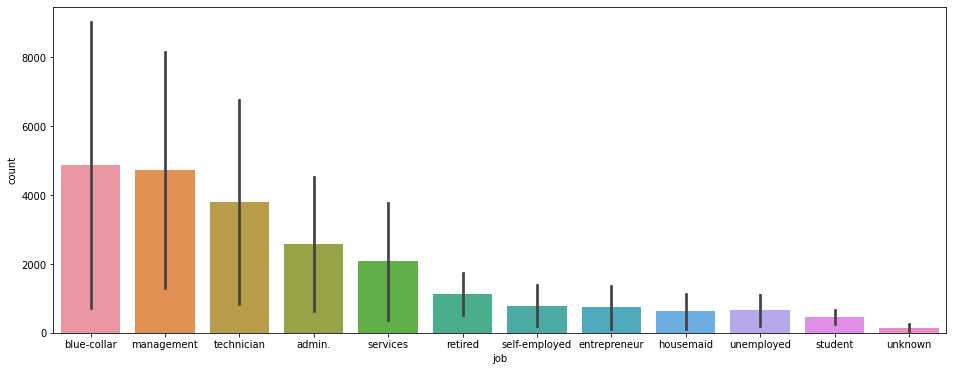

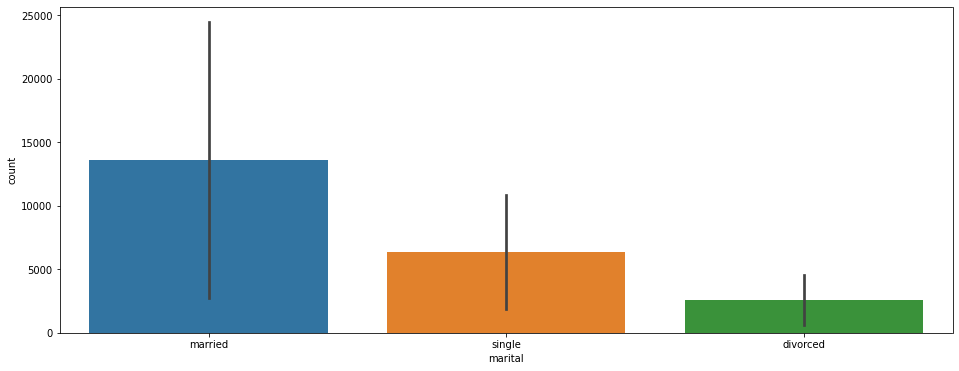

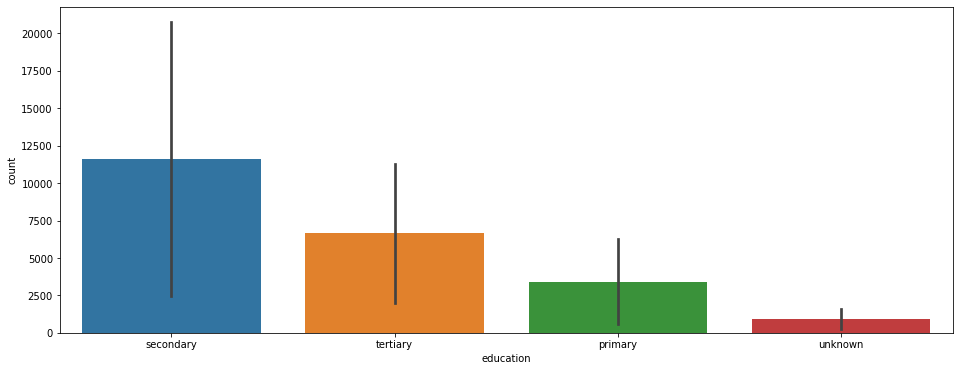

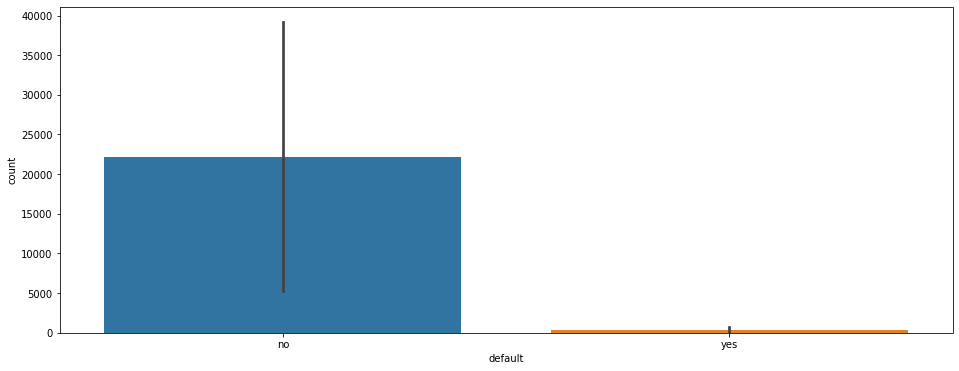

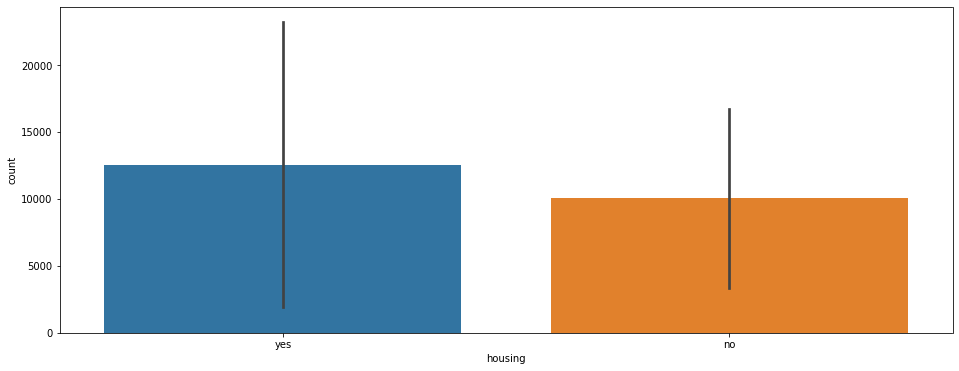

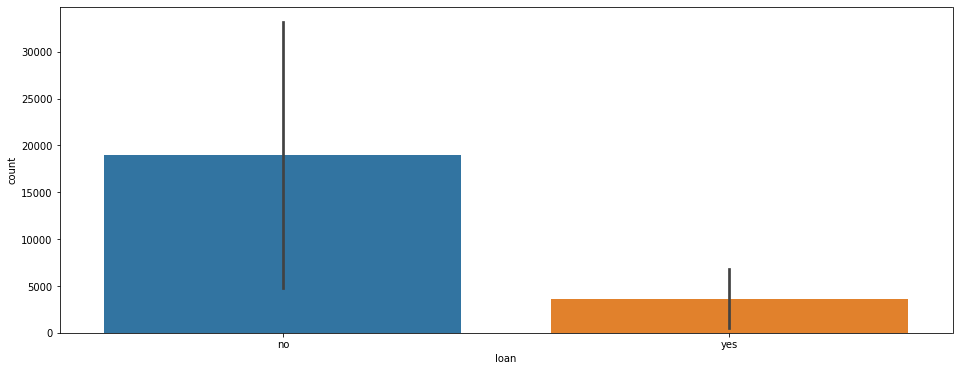

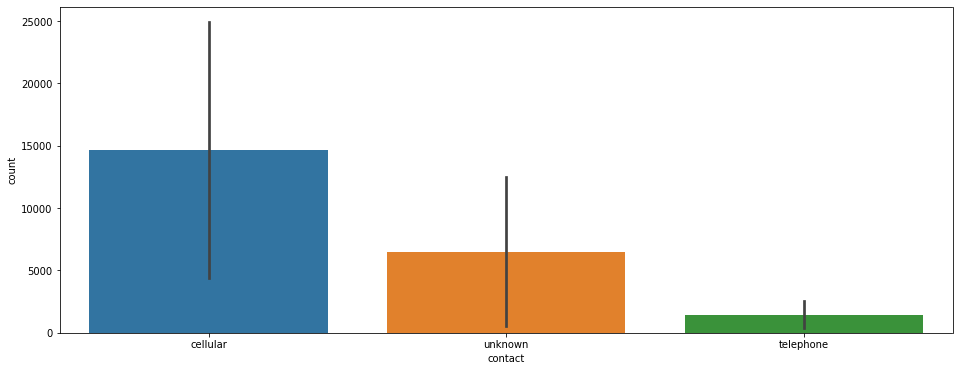

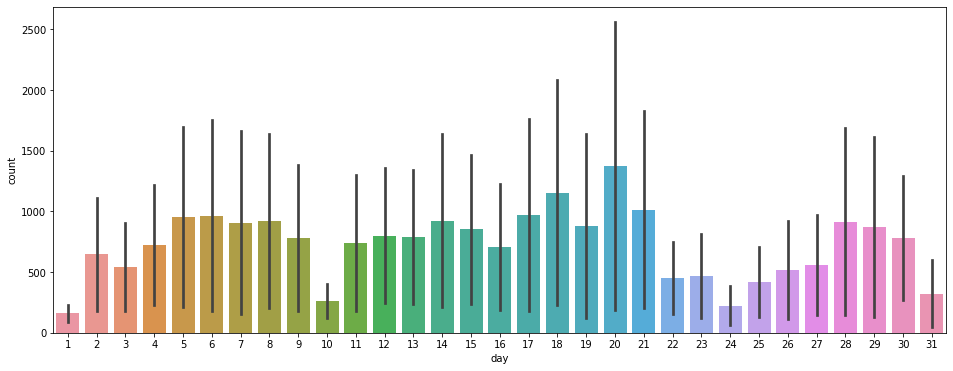

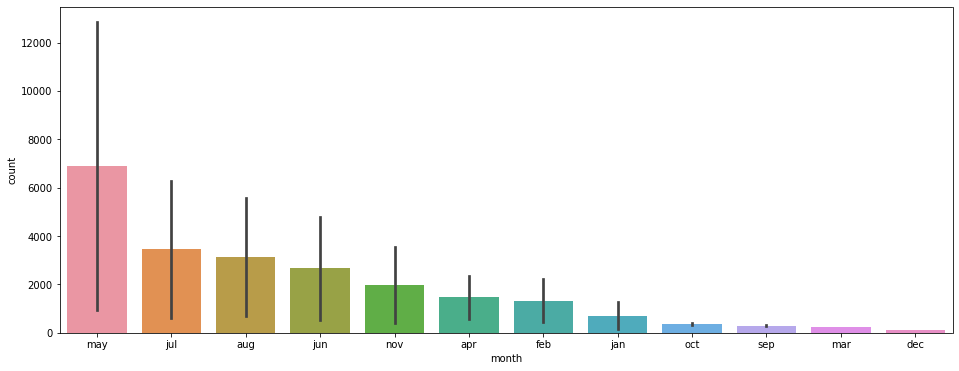

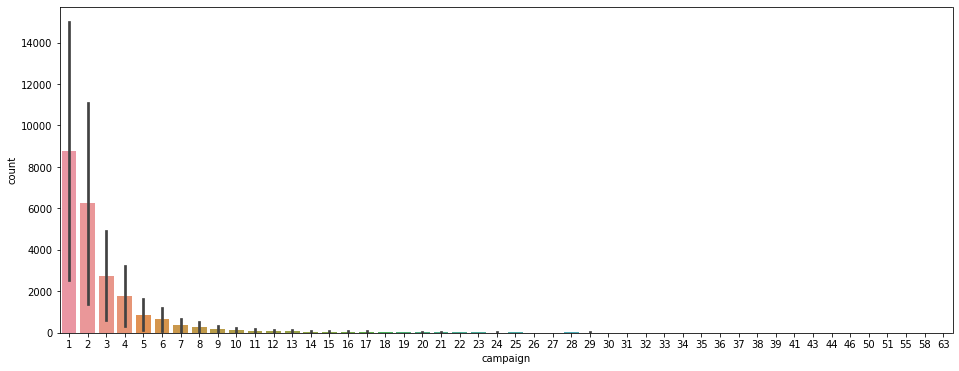

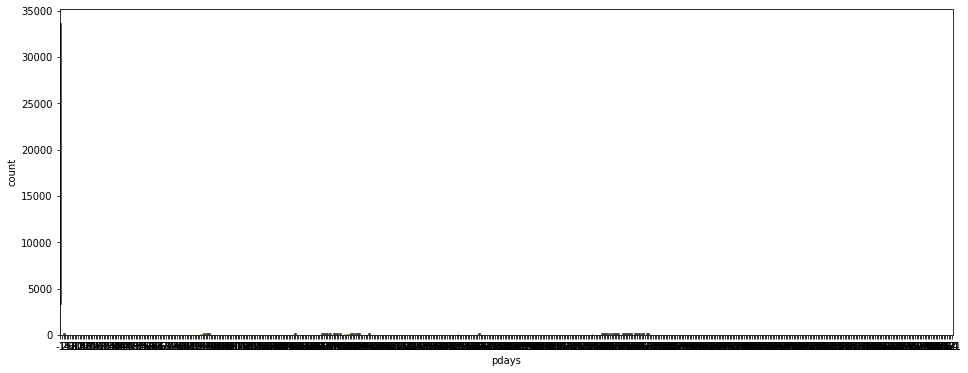

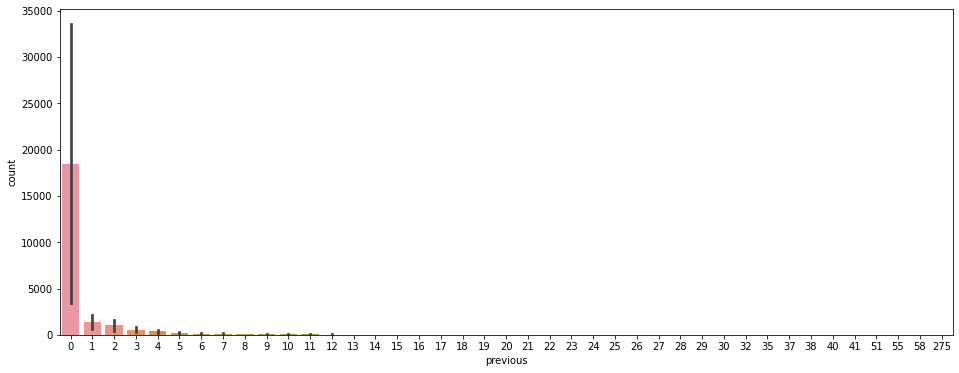

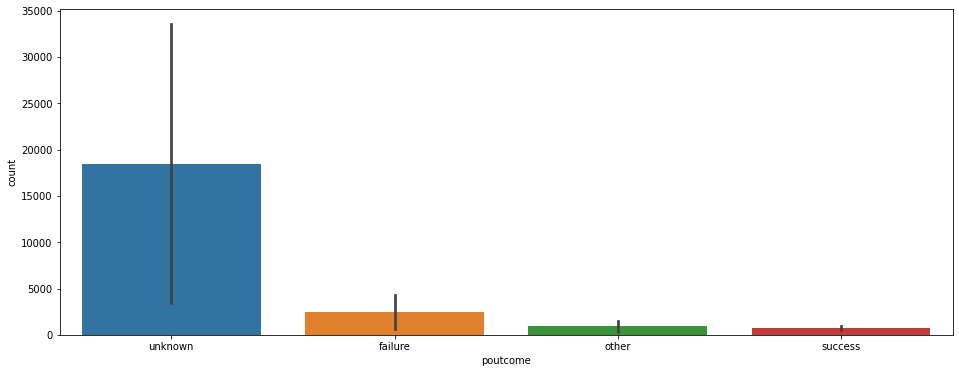

In [140]:
cat_target = 'y'
cat_count = 'count'
numerics = ['age', 'balance', 'duration']

def myFunction(cat_target, cat_count, numerics):

    df_cat = df.drop(
        columns=numerics
    )

    df_cat[cat_count] = 1

    col_cat = [col for col in df_cat.drop(columns=[cat_target, cat_count]).columns]

    for col in col_cat:
        df_cat_col = df_cat[
            [col, cat_target, cat_count]
        ]
        df_cat_col = df_cat_col.groupby(
            by=[col, cat_target], 
            as_index=False
        ).count().sort_values(
            by=[cat_count], 
            ascending=False
        )
        plt.figure(figsize=(16, 6))
        sns.barplot(data=df_cat_col, x=col, y=cat_count, hue=None);
        
myFunction(cat_target, cat_count, numerics)

## Data preprocessing

We are going to drop our duration column.

In [193]:
df = df.drop(columns=['duration'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [207]:
X = df.iloc[:, :-1].values
X

array([[58, 'management', 'married', ..., -1, 0, 'unknown'],
       [44, 'technician', 'single', ..., -1, 0, 'unknown'],
       [33, 'entrepreneur', 'married', ..., -1, 0, 'unknown'],
       ...,
       [72, 'retired', 'married', ..., 184, 3, 'success'],
       [57, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [37, 'entrepreneur', 'married', ..., 188, 11, 'other']],
      dtype=object)

In [215]:
y = df.iloc[:, -1].values
y

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

How do we want to encode this?

One-hot encoding:
- job
- marital
- contact
- outcome

Ordinal encoding:
- education
- default
- housing
- loan
- month
- y

No encoding:
- age
- balance
- day
- campaign
- pdays
- previous

In [208]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

nominal = [1, 2, 8, 14]
ordinal = [3, 4, 6, 7, 10]

def createColumnTransformer(nominal, ordinal):
    ct = ColumnTransformer(
        transformers=[
            ('onehot_encoder', OneHotEncoder(), nominal),
            ('ordinal_encoder', OrdinalEncoder(), ordinal)
        ],
        remainder='passthrough'
    )

createColumnTransformer(nominal, ordinal)
    
X = np.array(ct.fit_transform(X))

# pd.DataFrame(X).to_csv('data/x_encoded.csv')
# os.system('open x_oh_encoded.csv')

In [216]:
from sklearn.preprocessing import LabelEncoder

y = y

def createLabelEncoder(y):
    lab_enc = LabelEncoder()
    y = lab_enc.fit_transform(y)

createLabelEncoder(y)